# 🍔 Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*:

Image Classification on Fashion-MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are the weight matrix and the bias vector for the $i$-th layer, respectively.
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

Our loss function will be the **categorical crossentropy**.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import tensorflow as tf

%matplotlib inline

## Data preparation (`keras.dataset`)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of $60,000$ examples and a test set of $10,000$ examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `categorical_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print('Number of categories:',len(set(y_train)))

Number of categories: 10


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

#### Split Training and Validation Data

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [7]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

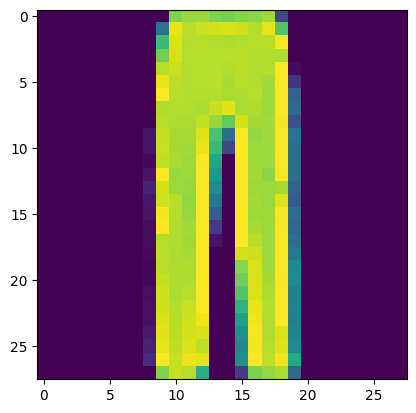

In [8]:
plt.imshow(X_train[6].reshape(28, 28))
Y_train[6]

In [9]:
print(np.asarray(range(10)))
print(Y_train[6].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 1 0 0 0 0 0 0 0 0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

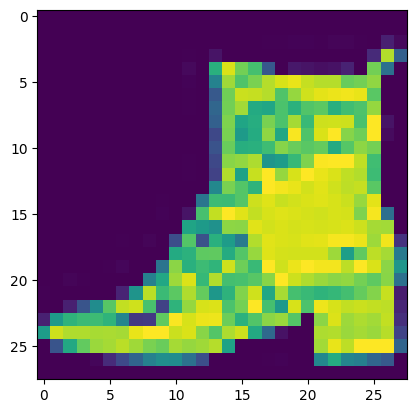

In [10]:
plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

In [11]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 1]


## Model definition

In our case we build a Sequential model with five [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers. Notice that the output layer has the softmax activation function.

The resulting model is actually a `function` of its own inputs implemented using the Keras backend.

We apply the categorical crossentropy loss and choose SGD as the optimizer.

Please remind that Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out.

## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [12]:
dims = X_train.shape[1]

nb_classes = 10

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(nb_classes, activation = "softmax"))


model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,170 (2.07 MB)

 Trainable params: 542,170 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
n_epochs = 30
network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/30
352/352 - 5s - 15ms/step - accuracy: 0.1484 - loss: 2.2563 - val_accuracy: 0.1933 - val_loss: 2.1944
Epoch 2/30
352/352 - 1s - 3ms/step - accuracy: 0.2350 - loss: 2.1208 - val_accuracy: 0.2540 - val_loss: 2.0546
Epoch 3/30
352/352 - 1s - 2ms/step - accuracy: 0.2934 - loss: 1.9668 - val_accuracy: 0.3580 - val_loss: 1.8855
Epoch 4/30
352/352 - 1s - 4ms/step - accuracy: 0.4282 - loss: 1.7760 - val_accuracy: 0.5009 - val_loss: 1.6867
Epoch 5/30
352/352 - 1s - 4ms/step - accuracy: 0.5402 - loss: 1.5875 - val_accuracy: 0.5605 - val_loss: 1.5153
Epoch 6/30
352/352 - 1s - 3ms/step - accuracy: 0.5718 - loss: 1.4357 - val_accuracy: 0.5701 - val_loss: 1.3864
Epoch 7/30
352/352 - 1s - 3ms/step - accuracy: 0.5784 - loss: 1.3236 - val_accuracy: 0.5753 - val_loss: 1.2909
Epoch 8/30
352/352 - 1s - 3ms/step - accuracy: 0.5855 - loss: 1.2379 - val_accuracy: 0.5841 - val_loss: 1.2140
Epoch 9/30
352/352 - 1s - 3ms/step - accuracy: 0.6035 - loss: 1.1674 - val_accuracy: 0.6147 - val_loss: 1.1486


### Plotting Network Performance Trend
The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

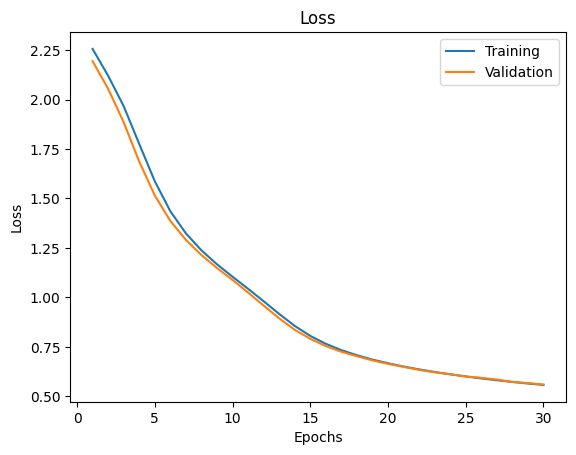

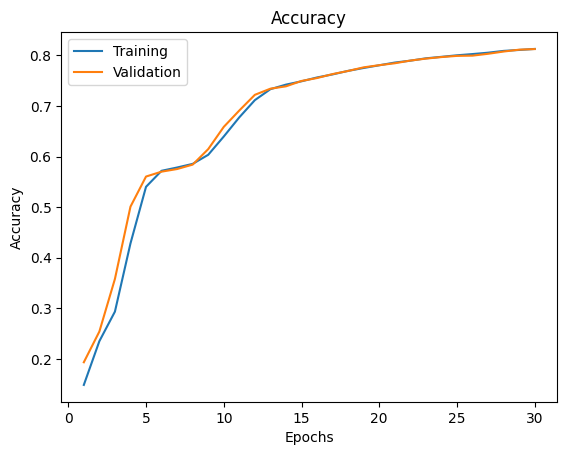

In [15]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(network_history)
plot_accuracy(network_history)

After `30` epochs, we get a `~80%` validation accuracy.

* If you increase the number of epochs, you will get definitely better results.

---

## Inspecting Layers

In [16]:
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

Layers - Network Configuration:

dense True
Layer Configuration:
{'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dense_1 True
Layer Configuration:
{'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 

In [17]:
for layer in model.layers:
  print(layer.get_config(),
        layer.get_weights(),)

{'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.04118278,  0.00191767, -0.00454264, ..., -0.03611283,
        -0.01050466,  0.01381245],
       [ 0.06108601, -0.04566616,  0.03475504, ..., -0.00384318,
        -0.00855056,  0.05554328],
       [-0.0195471 ,  0.04608222,  0.03177383, ..., -0.03980014,
         0.05226518, -0.00027243],
       ...,
       [ 0.06066972, -0.02997035, -0.01224631, ...,  0.0547372 ,
         0.04176716, -0.00848117],
       [-0.04295312, 

In [18]:
layer = model.layers[3]

print(layer.get_config())
print(layer.get_weights())

{'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 8.71639252e-02,  3.34631145e-01, -2.10897386e-04,
        -2.53846079e-01, -3.35392267e-01, -4.25467789e-02,
         1.78167835e-01, -3.22724789e-01,  4.91459593e-02,
         6.81811869e-02,  1.36765838e-01, -7.76709393e-02,
        -3.13157976e-01, -7.17617869e-02, -2.38085445e-02,
        -1.49196848e-01],
       [ 2.75004238e-01,  1.03608280e-01,  2.97923237e-01,
        -2.55936116e-01, -3.21130097e-01,  6.2164545

# 🛂 Regularization

Regularization is a technique that makes slight changes to the learning algorithm to reduce overfitting and generalize better. This in turn improves the performance of the model even on invisible data (test set).

### L1 Kernel/Bias regularization

Applying [L1 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}|W_j|$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

In [21]:
model_l1 = Sequential()
model_l1.add(Input((dims,)))
model_l1.add(Dense(512, activation = "relu", kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(16, activation = "relu", kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(nb_classes, activation = "softmax"))

model_l1.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

model_l1.fit(X_train, Y_train, batch_size=128,
                            epochs=30, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/30
352/352 - 6s - 16ms/step - accuracy: 0.2402 - loss: 194.2774 - val_accuracy: 0.3057 - val_loss: 184.9359
Epoch 2/30
352/352 - 1s - 2ms/step - accuracy: 0.3225 - loss: 176.0043 - val_accuracy: 0.3358 - val_loss: 167.1651
Epoch 3/30
352/352 - 1s - 4ms/step - accuracy: 0.3712 - loss: 158.7117 - val_accuracy: 0.4017 - val_loss: 150.3490
Epoch 4/30
352/352 - 1s - 3ms/step - accuracy: 0.4318 - loss: 142.3723 - val_accuracy: 0.4529 - val_loss: 134.4955
Epoch 5/30
352/352 - 1s - 4ms/step - accuracy: 0.4676 - loss: 126.9932 - val_accuracy: 0.4816 - val_loss: 119.5934
Epoch 6/30
352/352 - 1s - 4ms/step - accuracy: 0.4926 - loss: 112.5571 - val_accuracy: 0.5052 - val_loss: 105.6264
Epoch 7/30
352/352 - 1s - 3ms/step - accuracy: 0.5106 - loss: 99.0577 - val_accuracy: 0.5185 - val_loss: 92.5987
Epoch 8/30
352/352 - 2s - 4ms/step - accuracy: 0.5205 - loss: 86.4989 - val_accuracy: 0.5255 - val_loss: 80.5150
Epoch 9/30
352/352 - 1s - 3ms/step - accuracy: 0.5267 - loss: 74.8836 - val_accurac

### L2 Kernel/Bias regularization

Applying [L2 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}W_j^2$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



In [22]:
model_l2 = Sequential()
model_l2.add(Input((dims,)))
model_l2.add(Dense(512, activation = "relu", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(16, activation = "relu", kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(nb_classes, activation = "softmax"))

model_l2.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

model_l2.fit(X_train, Y_train, batch_size=128,
                            epochs=30, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/30
352/352 - 4s - 12ms/step - accuracy: 0.1777 - loss: 12.4750 - val_accuracy: 0.2201 - val_loss: 12.2650
Epoch 2/30
352/352 - 3s - 8ms/step - accuracy: 0.2773 - loss: 12.0901 - val_accuracy: 0.3486 - val_loss: 11.9208
Epoch 3/30
352/352 - 1s - 2ms/step - accuracy: 0.4141 - loss: 11.7613 - val_accuracy: 0.4427 - val_loss: 11.6105
Epoch 4/30
352/352 - 1s - 3ms/step - accuracy: 0.4587 - loss: 11.4648 - val_accuracy: 0.4729 - val_loss: 11.3292
Epoch 5/30
352/352 - 1s - 2ms/step - accuracy: 0.5326 - loss: 11.1929 - val_accuracy: 0.5691 - val_loss: 11.0682
Epoch 6/30
352/352 - 1s - 3ms/step - accuracy: 0.6000 - loss: 10.9398 - val_accuracy: 0.6223 - val_loss: 10.8226
Epoch 7/30
352/352 - 1s - 4ms/step - accuracy: 0.6442 - loss: 10.7037 - val_accuracy: 0.6554 - val_loss: 10.5981
Epoch 8/30
352/352 - 1s - 3ms/step - accuracy: 0.6682 - loss: 10.4868 - val_accuracy: 0.6745 - val_loss: 10.3888
Epoch 9/30
352/352 - 1s - 3ms/step - accuracy: 0.6847 - loss: 10.2846 - val_accuracy: 0.6905 - 

### Weight Control

We will analyze how the weights have changed by introducing the penalties in the model

In [23]:
layer = model.layers[3]
weights = layer.get_weights()[0][0]

print(layer.get_config())
print(weights)

{'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[ 8.7163925e-02  3.3463115e-01 -2.1089739e-04 -2.5384608e-01
 -3.3539227e-01 -4.2546779e-02  1.7816783e-01 -3.2272479e-01
  4.9145959e-02  6.8181187e-02  1.3676584e-01 -7.7670939e-02
 -3.1315798e-01 -7.1761787e-02 -2.3808545e-02 -1.4919685e-01]


In [24]:
layer_l1 = model_l1.layers[3]
weights_l1 = layer_l1.get_weights()[0][0]

print(layer_l1.get_config())
print(weights_l1)

{'name': 'dense_8', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': {'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}, 'kernel_constraint': None, 'bias_constraint': None}
[-2.6617576e-05 -1.3316765e-01  1.0076763e-01 -9.0392587e-06
  6.8346716e-02  1.3948728e-01 -1.0892102e-01  2.0265201e-02
  2.2454280e-01  4.1337851e-01 -1.8746503e-05 -3.9759398e-01
  1.3762592e-02 -1.20319

In [25]:
layer_l2 = model_l2.layers[3]
weights_l2 = layer_l2.get_weights()[0][0]

print(layer_l2.get_config())
print(weights_l2)

{'name': 'dense_13', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 16, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.01}, 'registered_name': None}, 'bias_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.01}, 'registered_name': None}, 'kernel_constraint': None, 'bias_constraint': None}
[-0.22741893 -0.1332377  -0.25940692 -0.16478106  0.00795466  0.14058994
 -0.21464139  0.08392943 -0.09121123  0.25209153  0.21895285 -0.12714818
  0.01331183  0.27793512  0.26501915 -0.17240828]


In [26]:
layer = model.layers[1]
weights = layer.get_weights()[0][0]

layer_l1 = model_l1.layers[1]
weights_l1 = layer_l1.get_weights()[0][0]

layer_l2 = model_l2.layers[1]
weights_l2 = layer_l2.get_weights()[0][0]

print('Sum of the values of the weights without regularization:', np.sum(np.abs(weights)))
print('Sum of the values of the weights with regularization l2:', np.sum(np.abs(weights_l2)))
print('Sum of the values of the weights with regularization l1:', np.sum(np.abs(weights_l1)))

Sum of the values of the weights without regularization: 11.257511
Sum of the values of the weights with regularization l2: 9.092367
Sum of the values of the weights with regularization l1: 0.051273078


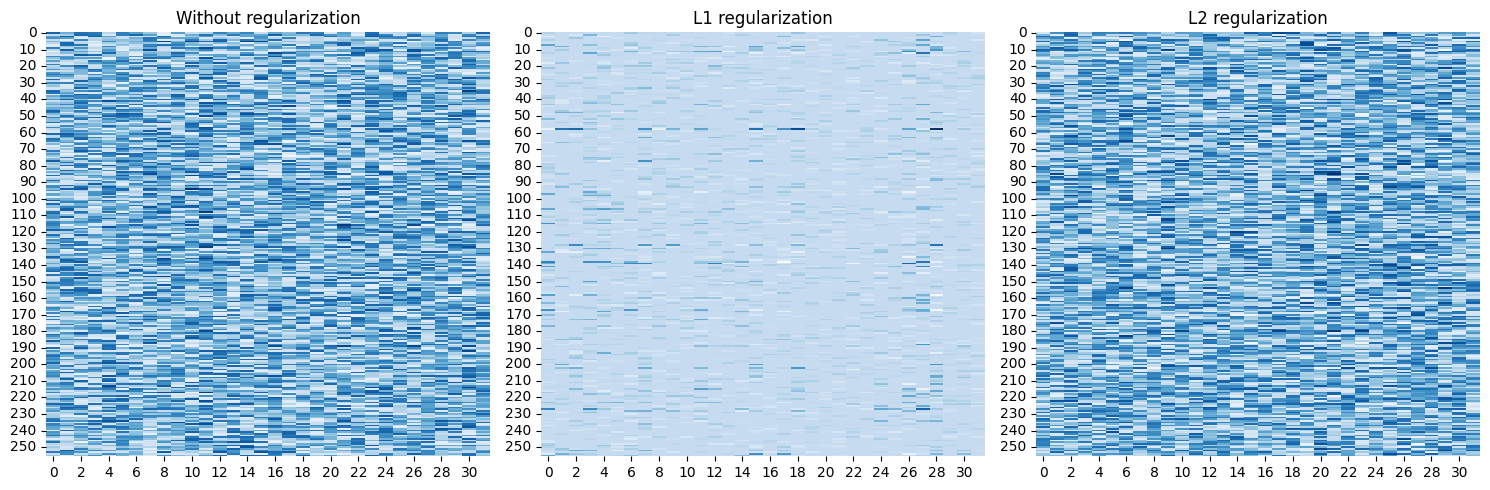

In [27]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

layer = model.layers[2]
layer_w_numpy = np.array(layer.get_weights()[0])

layer_l1 = model_l1.layers[2]
layer_w_numpy_l1 = np.array(layer_l1.get_weights()[0])

layer_l2 = model_l2.layers[2]
layer_w_numpy_l2 = np.array(layer_l2.get_weights()[0])

sns.heatmap(layer_w_numpy, ax=axes[0], cmap="Blues", cbar=False)
axes[0].set_title("Without regularization")

sns.heatmap(layer_w_numpy_l1, ax=axes[1], cmap="Blues", cbar=False)
axes[1].set_title("L1 regularization")

sns.heatmap(layer_w_numpy_l2, ax=axes[2], cmap="Blues", cbar=False)
axes[2].set_title("L2 regularization")

plt.tight_layout()

plt.show()

### Dropout

[Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass


<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" width="60%" />




```python
from keras.layers import Dropout

Dropout(rate, noise_shape=None, seed=None, **kwargs)
```

* `rate`: Float between 0 and 1. Fraction of the input units to drop

* `noise_shape`: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features)

* `seed`: A Python integer to use as random seed.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [29]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

In [32]:
model_d = Sequential()
model_d.add(Input((dims,)))
model_d.add(Dense(512, activation = "relu"))
model_d.add(Dense(256, activation = "relu"))
model_d.add(Dropout(0.1))
model_d.add(Dense(32, activation = "relu"))
model_d.add(Dropout(0.1))
model_d.add(Dense(16, activation = "relu"))
model_d.add(Dropout(0.1))
model_d.add(Dense(nb_classes, activation = "softmax"))

model_d.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
n_epochs =30
network_history = model_d.fit(X_train, Y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/30
352/352 - 6s - 18ms/step - accuracy: 0.2031 - loss: 2.1630 - val_accuracy: 0.3616 - val_loss: 2.0073
Epoch 2/30
352/352 - 1s - 3ms/step - accuracy: 0.3480 - loss: 1.9468 - val_accuracy: 0.4578 - val_loss: 1.7712
Epoch 3/30
352/352 - 1s - 3ms/step - accuracy: 0.4276 - loss: 1.7543 - val_accuracy: 0.5579 - val_loss: 1.5594
Epoch 4/30
352/352 - 1s - 2ms/step - accuracy: 0.4880 - loss: 1.5918 - val_accuracy: 0.6173 - val_loss: 1.3797
Epoch 5/30
352/352 - 1s - 3ms/step - accuracy: 0.5249 - loss: 1.4512 - val_accuracy: 0.6313 - val_loss: 1.2364
Epoch 6/30
352/352 - 1s - 3ms/step - accuracy: 0.5481 - loss: 1.3432 - val_accuracy: 0.6443 - val_loss: 1.1275
Epoch 7/30
352/352 - 1s - 2ms/step - accuracy: 0.5650 - loss: 1.2569 - val_accuracy: 0.6599 - val_loss: 1.0451
Epoch 8/30
352/352 - 1s - 4ms/step - accuracy: 0.5861 - loss: 1.1894 - val_accuracy: 0.6813 - val_loss: 0.9824
Epoch 9/30
352/352 - 1s - 2ms/step - accuracy: 0.6052 - loss: 1.1319 - val_accuracy: 0.6991 - val_loss: 0.9331


## 🛑 Early-Stopping

Early stopping is a regularization technique used to prevent overfitting by halting the training process once the model's performance on a validation dataset starts to degrade. It monitors a specific metric, such as validation loss, and stops training when this metric doesn't improve for a set number of consecutive epochs, known as the "patience" parameter.

In Keras is implemented with the object EarlyStopping ([Official docs](https://keras.io/api/callbacks/early_stopping/)).

```python
from keras.callbacks import EarlyStopping

keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

```
The main parameters are:

* `monitor` = Quantity to be monitored.
* `patience` = Number of epochs with no improvement after which training will be stopped.
* `mode` = One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [35]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

In [36]:
model_d = Sequential()
model_d.add(Input((dims,)))
model_d.add(Dense(512, activation = "relu"))
model_d.add(Dense(256, activation = "relu"))
model_d.add(Dense(32, activation = "relu"))
model_d.add(Dense(16, activation = "relu"))
model_d.add(Dense(nb_classes, activation = "softmax", ))


model_d.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


In [37]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.15)

In [38]:
n_epochs = 500
network_history = model_d.fit(X_train, Y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/500
352/352 - 2s - 7ms/step - accuracy: 0.1782 - loss: 2.2400 - val_accuracy: 0.2520 - val_loss: 2.1608
Epoch 2/500
352/352 - 1s - 2ms/step - accuracy: 0.3412 - loss: 2.0893 - val_accuracy: 0.4494 - val_loss: 2.0027
Epoch 3/500
352/352 - 1s - 2ms/step - accuracy: 0.5156 - loss: 1.9130 - val_accuracy: 0.5788 - val_loss: 1.7971
Epoch 4/500
352/352 - 1s - 4ms/step - accuracy: 0.6048 - loss: 1.6871 - val_accuracy: 0.6286 - val_loss: 1.5483
Epoch 5/500
352/352 - 1s - 4ms/step - accuracy: 0.6308 - loss: 1.4260 - val_accuracy: 0.6489 - val_loss: 1.2809
Epoch 6/500
352/352 - 1s - 4ms/step - accuracy: 0.6609 - loss: 1.1847 - val_accuracy: 0.6787 - val_loss: 1.0782
Epoch 7/500
352/352 - 2s - 4ms/step - accuracy: 0.6890 - loss: 1.0200 - val_accuracy: 0.7061 - val_loss: 0.9489
Epoch 8/500
352/352 - 1s - 4ms/step - accuracy: 0.7121 - loss: 0.9146 - val_accuracy: 0.7303 - val_loss: 0.8646
Epoch 9/500
352/352 - 1s - 3ms/step - accuracy: 0.7323 - loss: 0.8428 - val_accuracy: 0.7414 - val_loss:

## 📕 Exercise

Take a [dataset](https://keras.io/api/datasets/) from keras (or from Kaggle), create a neural network and apply regulizers. Monitor the effect on model performance and analyze how the loss and accuracy changes by using regularization methods during training.

Plot and analyze the weights of the network using different regularization methods (particularly L2 and Dropout) and also compare with the use of different learning rate values.